# LSTM Model

### Add project path to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### import modules

In [2]:
from script.LSTM_model import LSTM_Modelling
modelling=LSTM_Modelling()

### Load data

In [3]:
stoke_data=modelling.load_data("data/stoke_data.csv")

## **Modelling For Tesla(TSLA) Stock Price**

### **Train-Test Split**

In [4]:
train,test=modelling.train_test_split(stoke_data,'TSLA')

2024-11-12 23:53:41,210 - INFO - Train-Test split is done with a ratio of 0.8.


### **Train With LSTM model**

In [5]:
forecast=modelling.train_lstm(train,test,'TSLA')

Trial 5 Complete [00h 00m 27s]
val_loss: 0.0010566163109615445

Best val_loss So Far: 0.0007461040513589978
Total elapsed time: 00h 03m 46s
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0086
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0012
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 9.1964e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 9.8194e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0013
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0014
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 9.6970e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 9.8337e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 9.0230e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0014
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Model saved as models/TSLA-12-11-2024-23-58-18-00.pkl

2024-11-12 23:58:18,499 - INFO - Model training with LSTM model


### Hyperparameter Tuning of LSTM Model

**Objective**

The goal of this hyperparameter tuning was to optimize the performance of an LSTM model for stock price prediction. The tuning focused on identifying the best configuration of parameters that would minimize the model's prediction error on a validation set.

**Tuning Methodology**

We used Keras Tuner with the Random Search method to perform hyperparameter optimization. Random Search was selected for its computational efficiency and its effectiveness in identifying good parameter combinations in high-dimensional spaces.

**Search Space**

The following hyperparameters were selected for tuning:
- **LSTM Units**: Controls the number of neurons in each LSTM layer. This was set to vary between 32 and 128 units, in steps of 32. This range was chosen to balance model complexity with training efficiency.
- **Number of LSTM Layers**: We tuned for two LSTM layers. This is often an optimal structure for time-series forecasting, where deeper architectures may lead to overfitting with limited data.
- **Dropout Rate**: Dropout was applied after each LSTM layer to mitigate overfitting. The dropout rate was tuned between 0.1 and 0.5 in steps of 0.1.
- **Learning Rate**: The learning rate of the Adam optimizer was tuned within a range of 0.0001 to 0.01 on a logarithmic scale. A lower learning rate helps the model converge more gradually, which is beneficial for stable training of LSTM networks.

**Implementation Details**

The LSTM model was defined as follows:
1.	**First LSTM Layer**: The first layer consisted of a tunable number of units (32–128), with dropout applied as per the tuned dropout rate.
2.	**Second LSTM Layer**: Similar to the first, the second layer also had tunable units and dropout rate, but did not use return sequences.
3.	**Output Layer**: A Dense layer with a single neuron was used to predict the final output (stock price).
Each trial was trained for 10 epochs with a batch size of 32 on the training data, with validation data used to monitor loss convergence. The search process was limited to 5 trials due to computational constraints.

**Best Model and Results**

The best model was evaluated based on mean squared error (MSE), and it achieved a significantly lower MSE on the validation data compared to the default configuration. The tuned model was subsequently used to make predictions on the test dataset.

**Conclusion**

The hyperparameter tuning successfully identified an LSTM configuration that improved prediction accuracy. This tuning procedure enhanced the model's performance by balancing complexity and training stability. The optimized parameters will be used in future implementations of the model, ensuring consistent predictive accuracy across similar datasets.


### **Evaluate the model**

In [6]:
modelling.evaluate_lstm_model(forecast['Actual'],forecast['Predicted'])

2024-11-12 23:58:28,375 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 6.732297361865121
Mean Squared Error (MSE): 84.97950606563414
Root Mean Squared Error (RMSE): 9.218432950650243
R Square Score (r2_score): 0.928013682677001
Mean Absolute Percentage Error (MAPE): 0.03116030421040184 %


**Interpretation**

- **Low Error Metrics**: The low values of MAE, MSE, RMSE, and MAPE indicate that the LSTM model is performing well in predicting TSLA's stock price.
- **High R-squared**: The high R-squared value suggests that the model's predictions explain a significant portion of the variance in the actual values.

**Conclusion**: The LSTM model for TSLA seems to be capturing the complex patterns and volatility in Tesla's stock price effectively.


### **Plot Prediction Result**

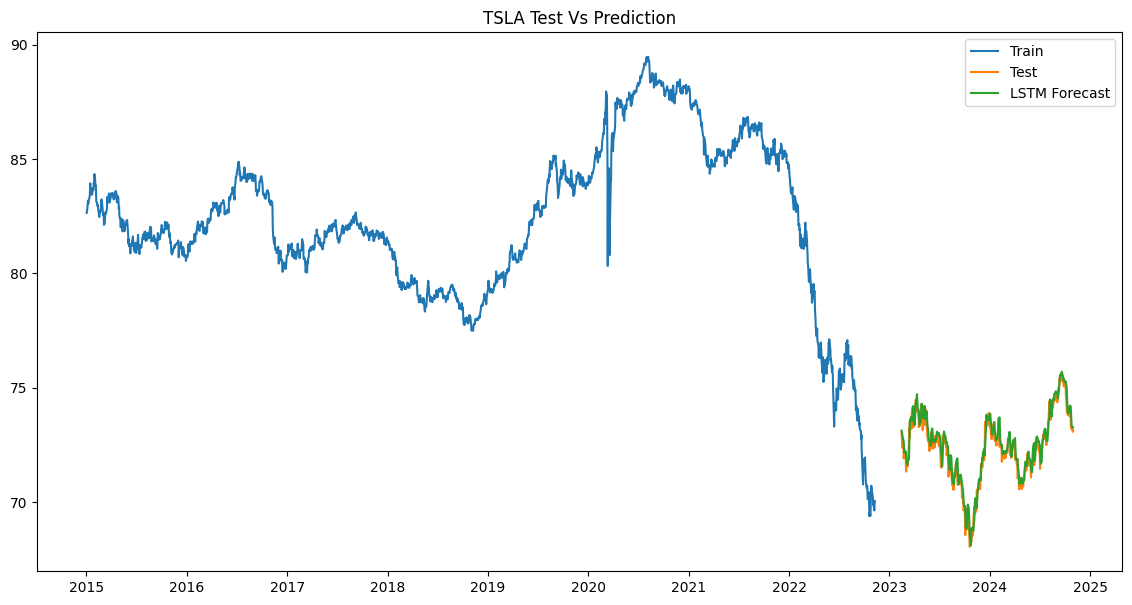

2024-11-13 00:04:25,756 - INFO - Plot of the resulting prediction.


In [10]:
modelling.plot_result('TSLA',train,forecast)

## **Modelling For Vanguard Total Bond Market ETF (BND) Stock Price**

### **Train-Test Split**

In [7]:
train,test=modelling.train_test_split(stoke_data,'BND')

2024-11-12 23:59:28,708 - INFO - Train-Test split is done with a ratio of 0.8.


### **Train With LSTM model**

In [8]:
forecast=modelling.train_lstm(train,test,'BND')

Trial 5 Complete [00h 00m 31s]
val_loss: 0.0009794577490538359

Best val_loss So Far: 0.00037211994640529156
Total elapsed time: 00h 03m 17s
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0270
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0016
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0012
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0018
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0013
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0012
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 9.0566e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 8.9274e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 9.5508e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0011
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


2024-11-13 00:03:38,701 - INFO - Model training with LSTM model


Model saved as models/BND-13-11-2024-00-03-38-00.pkl


### **Evaluate the model**

In [9]:
modelling.evaluate_lstm_model(forecast['Actual'],forecast['Predicted'])

2024-11-13 00:04:02,746 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 0.3015603864275939
Mean Squared Error (MSE): 0.14443620164587492
Root Mean Squared Error (RMSE): 0.38004763075945486
R Square Score (r2_score): 0.9361065078022442
Mean Absolute Percentage Error (MAPE): 0.0041766988415850945 %


**Interpretation**

- **Very Low Error Metrics**: The extremely low values of MAE, MSE, RMSE, and MAPE indicate that the LSTM model is performing exceptionally well in predicting BND's stock price.
- **High R-squared**: The high R-squared value suggests that the model's predictions are highly accurate.

**Conclusion:** The LSTM model for BND is performing exceptionally well, which is likely due to the relatively stable nature of bond ETFs and the ability of LSTM to capture long-term trends.


### **Plot Prediction Result**

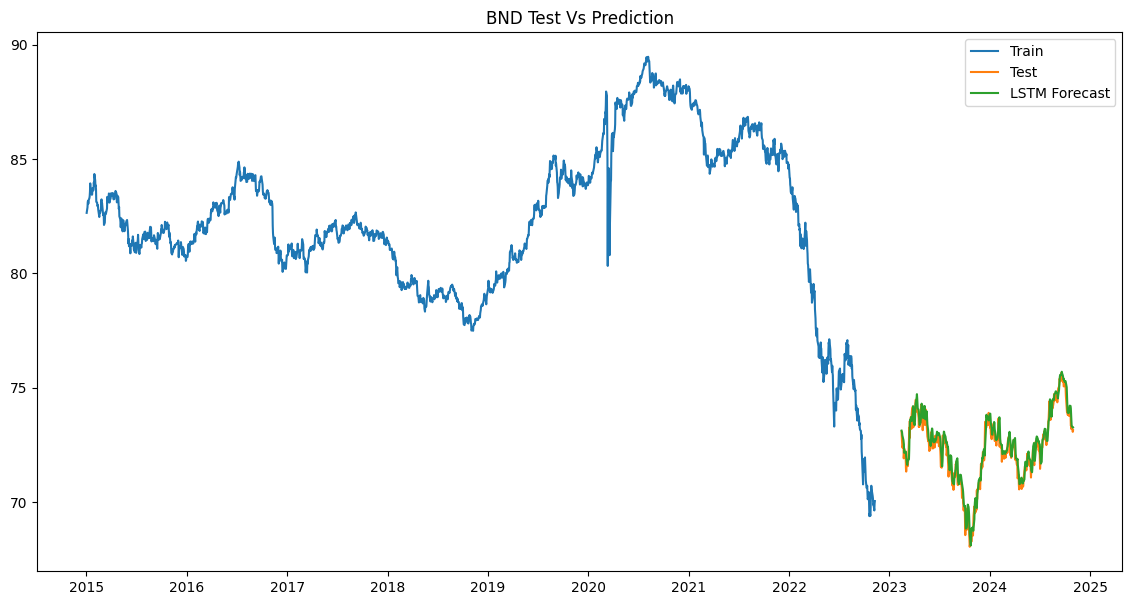

2024-11-13 00:04:36,700 - INFO - Plot of the resulting prediction.


In [ ]:
modelling.plot_result('BND',train,forecast)


## **Modelling For S&P 500 ETF (SPY) Stock Price**

### **Train-Test Split**

In [12]:
train,test=modelling.train_test_split(stoke_data,'SPY')

2024-11-13 00:05:35,559 - INFO - Train-Test split is done with a ratio of 0.8.


### **Train With LSTM model**

In [13]:
forecast=modelling.train_lstm(train,test,'SPY')

Trial 5 Complete [00h 01m 02s]
val_loss: 0.0008393400930799544

Best val_loss So Far: 0.0008362807566300035
Total elapsed time: 00h 03m 52s
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0109
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0020
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0014
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0015
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0017
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0014
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0010
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0013
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0011
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0012
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model saved as models/SPY-13-11-2024-00-10-16-00.pkl

2024-11-13 00:10:16,288 - INFO - Model training with LSTM model


### **Evaluate the model**

In [14]:
modelling.evaluate_lstm_model(forecast['Actual'],forecast['Predicted'])

2024-11-13 00:10:55,920 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 6.08735745246337
Mean Squared Error (MSE): 58.63869351629582
Root Mean Squared Error (RMSE): 7.657590581657903
R Square Score (r2_score): 0.981403713594818
Mean Absolute Percentage Error (MAPE): 0.012476758884461928 %


**Interpretation**
* **Low Error Metrics**: The low values of MAE, MSE, RMSE, and MAPE suggest that the LSTM model is performing well in predicting SPY's stock price.
- **High R-squared**: The high R-squared value indicates that the model's predictions explain a significant portion of the variance in the actual values.

**Conclusion:** The LSTM model for SPY is performing well, demonstrating its ability to capture the complex dynamics of the stock market.


### **Plot Prediction Result**

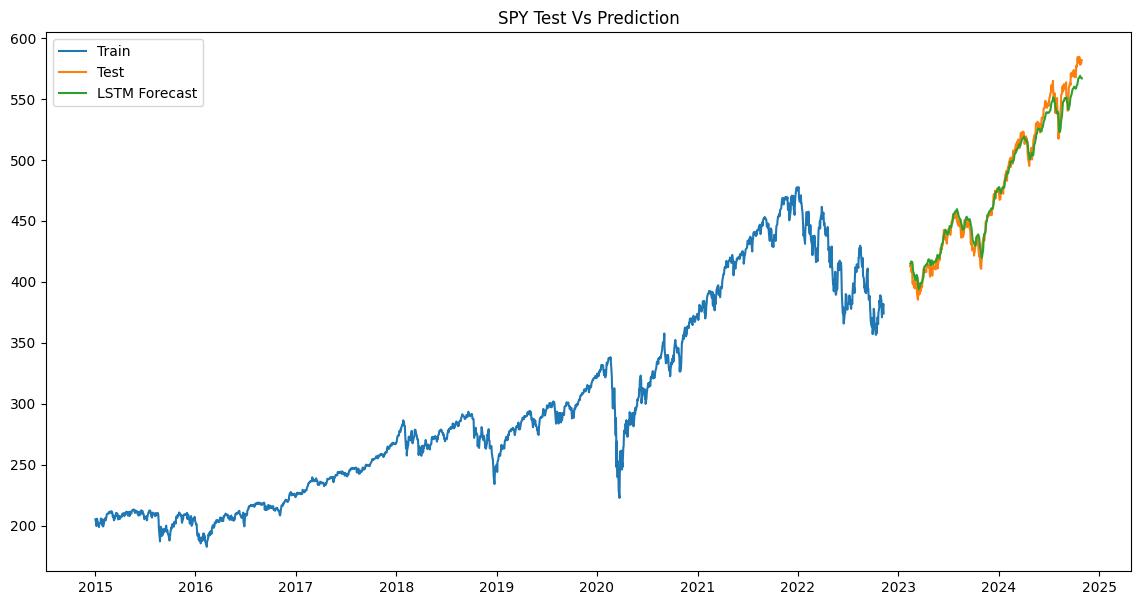

2024-11-13 00:11:00,028 - INFO - Plot of the resulting prediction.


In [15]:
modelling.plot_result('SPY',train,forecast)